1. Исходные данные

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest

In [ ]:
np.random.seed(103)

#X1 ~ R(5, 15)
a = 5
b = 15
n1 = 300
X1 = np.random.uniform(a, b, size = n1)

#X2 ~ N(10, 5)
m = 10
std2 = 5
n2 = 100
X2 = np.random.randn(n2) * std2 + m

In [ ]:
m1 = 10
m2 = 10

std1 = (100 / 12) ** 0.5
std2 = 5

#Выборочные характеристики
m_v1 = np.mean(X1)
m_v2 = np.mean(X2)

d_v1 = np.var(X1)
d_v2 = np.var(X2)

std_v1 = d_v1 ** 0.5
std_v2 = d_v2 ** 0.5

print("X1:", "m_v1 = {}, d_v1 = {}, std_v1 = {}".format(m_v1, d_v1, std_v1))
print("X2:", "m_v2 = {}, d_v2 = {}, std_v2 = {}".format(m_v2, d_v2, std_v2))

#pooled
X_pooled = np.hstack([X1, X2])
print("Pooled:", "m_v_pool = {}, d_v_pool = {}, std_v_pool = {}".format(np.mean(X_pooled), np.var(X_pooled, ddof=1), np.var(X_pooled, ddof=1) ** 0.5))

X1: m_v1 = 9.807609478409635, d_v1 = 7.890050943092375, std_v1 = 2.80892344913356
X2: m_v2 = 9.503375262282672, d_v2 = 22.746433713109223, std_v2 = 4.769322143985372
Pooled: m_v_pool = 9.731550924377894, d_v_pool = 11.650627916311565, std_v_pool = 3.4133016151977493


2. Однопараметрические критерии

In [ ]:
#z-test
print("z-test:", "Z={}, p={}".format(*ztest(X1, value=m1)))

#t-test
print("t-test:", "T={}, p={}".format(*st.ttest_1samp(X1, m1)))

#chi_square_test (m1 is known)
S01_sq = (np.sum((X1 - m1) ** 2) / n1)
S02_sq = (np.sum((X2 - m2) ** 2) / n2)

Z1 = n1 * S01_sq / (std1 ** 2)
value_test1 = st.chi2.cdf(Z1 , n1)
p_value1 = 2 * min(value_test1, 1 - value_test1)
np.seterr(divide='ignore')
print("chi_square_test (m1 is known):", "Z = {}, p_value = {}".format(Z1, p_value1))

#chi_square_test (m1 isn't known)
Z2 = (n1-1) * S01_sq / (std1 ** 2)
value_test2 = st.chi2.cdf(Z2 , n1 - 1)
p_value2 = 2 * min(value_test2, 1 - value_test2)
print("chi_square_test (m1 isn't known):", "Z = {}, p_value = {}".format(Z2, p_value2))

z-test: Z=-1.1843480861040068, p=0.23627530124761853
t-test: T=-1.1843480861040068, p=0.23721590169208354
chi_square_test (m1 is known): Z = 285.3743420120467, p_value = 0.5620861298375099
chi_square_test (m1 isn't known): Z = 284.4230942053399, p_value = 0.5628001467270163


3. Двухвыборочные критерии

In [ ]:
S1_sq = np.var(X1, ddof=1)
S2_sq = np.var(X2, ddof=1)

#Тк дисперсии не равны, то

Z = (m_v1 - m_v2) / ((S1_sq / n1 + S2_sq / n2) ** 0.5)

# Поиск числа степеней свободы

print()
#S_v1 = (np.sum((X1 - m_v1) ** 2) / (n1 - 1)) ** 0.5
#print(S1, s1)
a1 = (S1_sq / n1) / (S1_sq / n1 + S2_sq / n2)
a2 = (S2_sq / n2) / (S1_sq / n1 + S2_sq / n2)
k = int(1 / ((a1 ** 2) / (n1 - 1) + (a2 ** 2) / (n2 - 1)))
print("degree of freedom: k =", k)

val_test = st.t.cdf(Z, k)
p_value = 2 * min(val_test, 1 - val_test)
print("2-sample t-test:", "Z = {}, p_value = {}".format(Z, p_value))


degree of freedom: k = 122
2-sample t-test: Z = 0.6011194802192076, p_value = 0.5488756602245055


In [ ]:
# С библиотеками
st.ttest_ind(X1, X2, equal_var=False)

TtestResult(statistic=0.6011194802192076, pvalue=0.5488710143369961, df=122.51107506910354)

In [ ]:
# m известно
Z = S1_sq / S2_sq

val_test = st.f.cdf(Z, n2, n1)
p_value = 2 * min(val_test, 1 - val_test)

print("2-sample F-test:", "Z = {}, p_value = {}".format(Z, p_value))

# m не известно
Z = (S02_sq)/(S01_sq)

val_test = st.f.cdf(Z, n2 - 1, n1 - 1)
p_value = 2 * min(val_test, 1 - val_test)

print("2-sample F-test:", "Z = {}, p_value = {}".format(Z, p_value))

2-sample F-test: Z = 0.3445496019926273, p_value = 4.152473204635993e-09
2-sample F-test: Z = 2.900577916430378, p_value = 2.6989521728637555e-12


## 4) Исследование распределений статистик критерия

In [ ]:
N = 1500

Z = []
p_value = []
k_summ = 0
np.random.seed(15)

for i in range(N):
    X1 = np.random.uniform(a, b, size = n1)
    X2 = np.random.randn(n2) * std2 + m

    m_v1 = np.mean(X1)
    m_v2 = np.mean(X2)

    S1_sq = np.var(X1, ddof=1)
    S2_sq = np.var(X2, ddof=1)

    Z_i = (m_v1 - m_v2) / ((S1_sq / n1 + S2_sq / n2) ** 0.5)
    Z.append(Z_i)
    a1 = (S1_sq / n1) / (S1_sq / n1 + S2_sq / n2)
    a2 = (S2_sq / n2) / (S1_sq / n1 + S2_sq / n2)
    k_i = int(1 / ((a1 ** 2) / (n1 - 1) + (a2 ** 2) / (n2 - 1)))
    k_summ += k_i
    val_test_i = st.t.cdf(Z_i, k_i)
    p_value_i = 2 * min(val_test_i, 1 - val_test_i)
    p_value.append(p_value_i)

In [ ]:
print("Выборочные характеристики для Z:", "mean = {}, d = {}, std = {}".format(np.mean(Z), np.var(Z), np.var(Z) ** 0.5))
print("Выборочные характеристики для p:", "mean = {}, d = {}, std = {}".format(np.mean(p_value), np.var(p_value), np.var(p_value) ** 0.5))
print("Среднее значение степени свободы", k_summ / N)
deg_free_mean = int(k_summ / N)

Выборочные характеристики для Z: mean = 0.042695444421439445, d = 1.050345176183602, std = 1.0248634914873307
Выборочные характеристики для p: mean = 0.4964633629595258, d = 0.08287372033060042, std = 0.2878779608281961
Среднее значение степени свободы 121.47266666666667


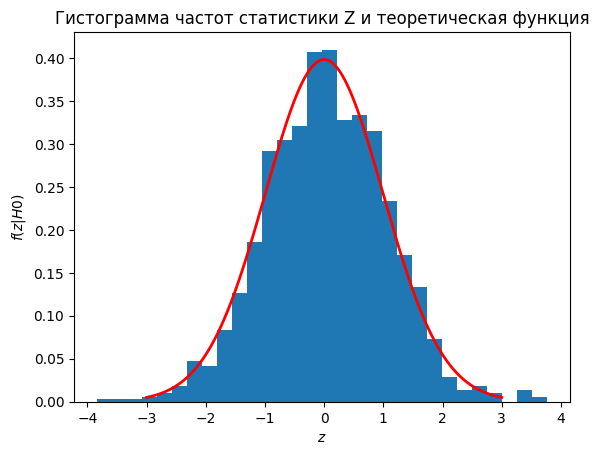

In [ ]:
x = np.linspace(-3, 3, 1500)
y = st.t.pdf(x, df=deg_free_mean)
plt.plot(x, y, c='r', lw=2)
plt.hist(Z, bins=30, density=True)
plt.title("Гистограмма частот статистики Z и теоретическая функция")
plt.ylabel("$f(z|H0)$")
plt.xlabel("$z$");

Text(0.5, 0, '$p$')

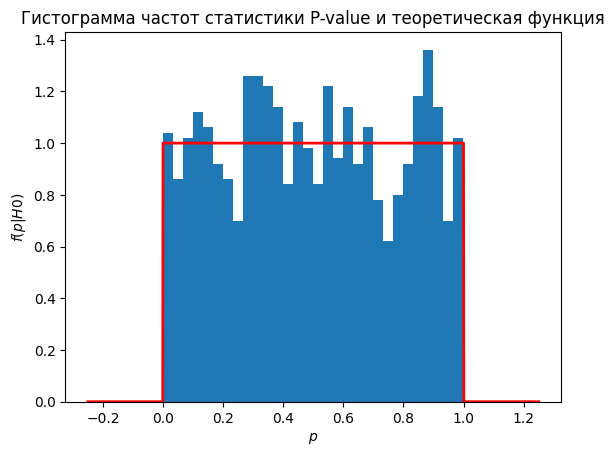

In [ ]:
x = np.linspace(-0.25, 1.25, 1500)
y = st.uniform.pdf(x, 0, 1)
plt.plot(x, y, c='r', lw=2)
plt.hist(p_value, bins=30, density=True)
plt.title("Гистограмма частот статистики P-value и теоретическая функция")
plt.ylabel('$f(p|H0)$')
plt.xlabel('$p$')